# Kmeans

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

import os
os.environ["OMP_NUM_THREADS"] = "8"

from sklearn.metrics import *
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.neighbors import kneighbors_graph
from kneed import KneeLocator

In [2]:
#scaling, normalization
from sklearn.preprocessing import StandardScaler, MinMaxScaler

#kmeans, dbscan, hierarchical (sklearn)
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
#evaluation
from sklearn.metrics import silhouette_score

#distance matrix (dbscan elbow, hierarchical)
from scipy.spatial.distance import pdist, squareform

# hierarchical (scipy)
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

In [3]:
df = pd.read_csv("train_cleaned.csv")

In [4]:
df = df.replace({"explicit": {False:0, True:1}})

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              15000 non-null  object 
 1   duration_ms       15000 non-null  int64  
 2   explicit          15000 non-null  int64  
 3   popularity        15000 non-null  int64  
 4   artists           15000 non-null  object 
 5   album_name        15000 non-null  object 
 6   danceability      15000 non-null  float64
 7   energy            15000 non-null  float64
 8   key               15000 non-null  int64  
 9   loudness          15000 non-null  float64
 10  speechiness       15000 non-null  float64
 11  acousticness      15000 non-null  float64
 12  instrumentalness  15000 non-null  float64
 13  liveness          15000 non-null  float64
 14  valence           15000 non-null  float64
 15  tempo             15000 non-null  float64
 16  time_signature    15000 non-null  float6

In [6]:
nostrings = df.drop(columns = ['name','explicit','artists','album_name','genre'])

In [7]:
nostrings

,duration_ms,popularity,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,241760,46,0.690,0.513,5,-12.529,0.0975,0.302000,0.536000,0.2810,0.6350,142.221,4.0
1,444000,0,0.069,0.196,1,-24.801,0.0805,0.283000,0.934000,0.3600,0.0336,75.596,4.0
2,333506,3,0.363,0.854,2,-7.445,0.0397,0.000089,0.800000,0.2620,0.4890,116.628,4.0
3,269800,23,0.523,0.585,5,-5.607,0.0765,0.066400,0.001270,0.1170,0.3850,140.880,4.0
4,307651,25,0.643,0.687,7,-11.340,0.0539,0.000576,0.096900,0.2990,0.6370,143.956,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,432026,0,0.554,0.657,1,-14.232,0.0558,0.016000,0.615000,0.1320,0.0335,117.319,4.0
14996,182746,44,0.103,0.860,1,-19.627,0.0595,0.548000,0.940000,0.1230,0.0016,92.323,3.0
14997,400091,43,0.799,0.535,1,-9.103,0.0594,0.001830,0.857000,0.0713,0.0708,126.000,4.0
14998,197250,37,0.511,0.970,5,-2.299,0.0531,0.000337,0.000014,0.4020,0.2700,160.044,4.0


In [8]:
X = nostrings.values

In [9]:
scaler = MinMaxScaler()
X_minmax = scaler.fit_transform(X)

In [10]:
kmeans = KMeans(n_clusters=8, n_init=10, max_iter=100, random_state=94)
kmeans.fit(X_minmax)

KMeans(max_iter=100, n_init=10, random_state=94)

In [11]:
np.unique(kmeans.labels_, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 array([1272, 2496, 1832, 2715, 1564, 2099, 1373, 1649], dtype=int64))

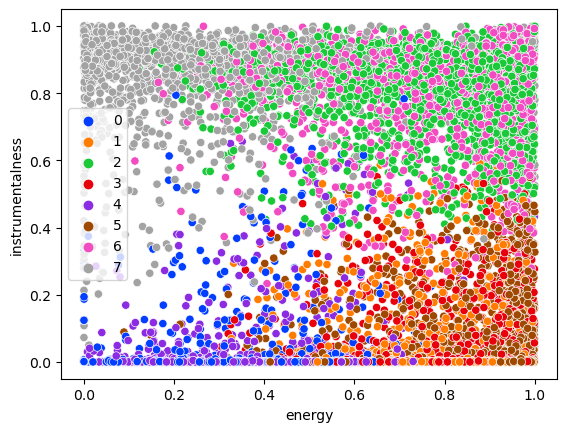

In [12]:
sns.scatterplot(data=df, 
                x="energy",
                y="instrumentalness",
                hue=kmeans.labels_,
                palette="bright")
plt.show()

In [13]:
df["kmeans.labels_"] = kmeans.labels_

df.to_csv('train_cleaned_kmeans8.csv', index=False)

In [12]:
df

,name,duration_ms,explicit,popularity,artists,album_name,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,genre,kmeans.labels_
0,Long Road,241760,0,46,Funki Porcini,Hed Phone Sex,0.690,0.513,5,-12.529,0.0975,0.302000,0.536000,0.2810,0.6350,142.221,4.0,j-dance,3
1,"Daniâl My Son, Where Did You Vanish?",444000,0,0,Siavash Amini,A Trail of Laughters,0.069,0.196,1,-24.801,0.0805,0.283000,0.934000,0.3600,0.0336,75.596,4.0,iranian,2
2,Ondskapens Galakse,333506,0,3,Kvelertak,Nattesferd,0.363,0.854,2,-7.445,0.0397,0.000089,0.800000,0.2620,0.4890,116.628,4.0,black-metal,3
3,Can't Look Away,269800,0,23,The Wood Brothers,One Drop of Truth,0.523,0.585,5,-5.607,0.0765,0.066400,0.001270,0.1170,0.3850,140.880,4.0,bluegrass,1
4,Thunderground,307651,0,25,The Darkraver;DJ Vince,Happy Hardcore Top 100,0.643,0.687,7,-11.340,0.0539,0.000576,0.096900,0.2990,0.6370,143.956,4.0,happy,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,Outpt,432026,0,0,Autechre,EP7,0.554,0.657,1,-14.232,0.0558,0.016000,0.615000,0.1320,0.0335,117.319,4.0,idm,3
14996,Natural Environment Sounds: To Improve Sleep a...,182746,0,44,Natural White Noise Relaxation,Baby Sleep White Noise: Ultimate Album to Help...,0.103,0.860,1,-19.627,0.0595,0.548000,0.940000,0.1230,0.0016,92.323,3.0,sleep,2
14997,Psychological Attack,400091,0,43,Droplex,Psychological Attack,0.799,0.535,1,-9.103,0.0594,0.001830,0.857000,0.0713,0.0708,126.000,4.0,techno,3
14998,Don't Hate The 808 (feat. Lafa Taylor),197250,0,37,Bassnectar;Lafa Taylor,Noise vs Beauty,0.511,0.970,5,-2.299,0.0531,0.000337,0.000014,0.4020,0.2700,160.044,4.0,breakbeat,1


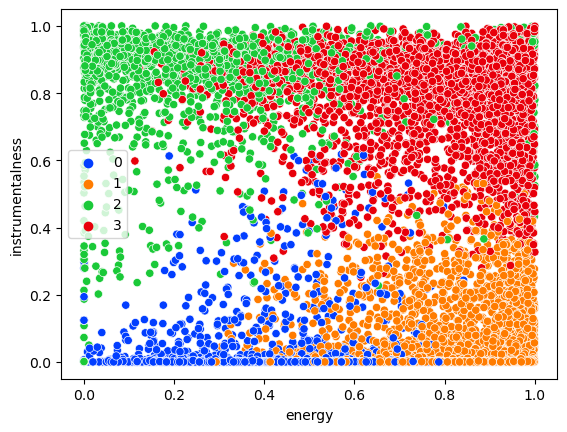

In [13]:
sns.scatterplot(data=df, 
                x="energy",
                y="instrumentalness",
                hue=kmeans.labels_,
                palette="bright")
plt.show()

In [14]:
kmeans.cluster_centers_

array([[0.05278042, 0.36471975, 0.56349297, 0.45946162, 0.47011442,
        0.75214523, 0.07995723, 0.65178067, 0.02041087, 0.20006684,
        0.44445144, 0.52972331, 0.77507827],
       [0.05742199, 0.31039512, 0.60353188, 0.80026922, 0.4839494 ,
        0.8300286 , 0.10358434, 0.11627437, 0.03246598, 0.24428797,
        0.53964296, 0.58843767, 0.79368606],
       [0.05077535, 0.23982071, 0.37572712, 0.26250572, 0.42552428,
        0.57097545, 0.06520948, 0.80754409, 0.8471966 , 0.18425846,
        0.18555393, 0.45805211, 0.71663847],
       [0.06818593, 0.20754516, 0.57640814, 0.7631104 , 0.51505655,
        0.77572265, 0.08104103, 0.08387113, 0.78709057, 0.19879632,
        0.35879517, 0.57792931, 0.78439361]])

In [15]:
centers = scaler.inverse_transform(kmeans.cluster_centers_)
centers

array([[ 2.25601776e+05,  3.42836569e+01,  5.52223106e-01,
         4.59461620e-01,  5.17125861e+00, -9.90272448e+00,
         7.50798372e-02,  6.49173552e-01,  2.04108664e-02,
         1.98866437e-01,  4.42229184e-01,  1.16817233e+02,
         3.87539136e+00],
       [ 2.44686392e+05,  2.91771412e+01,  5.91461239e-01,
         8.00269220e-01,  5.32344344e+00, -5.79928340e+00,
         9.72656972e-02,  1.15809277e-01,  3.24659817e-02,
         2.42822245e-01,  5.36944744e-01,  1.29765217e+02,
         3.96843028e+00],
       [ 2.17357591e+05,  2.25431472e+01,  3.68212578e-01,
         2.62505715e-01,  4.68076706e+00, -1.94480164e+01,
         6.12316977e-02,  8.04313909e-01,  8.47196597e-01,
         1.83152905e-01,  1.84626158e-01,  1.01011941e+02,
         3.58319233e+00],
       [ 2.88944165e+05,  1.95092448e+01,  5.64879975e-01,
         7.63110404e-01,  5.66562206e+00, -8.66050078e+00,
         7.60975243e-02,  8.35356502e-02,  7.87090567e-01,
         1.97603541e-01,  3.57001191e

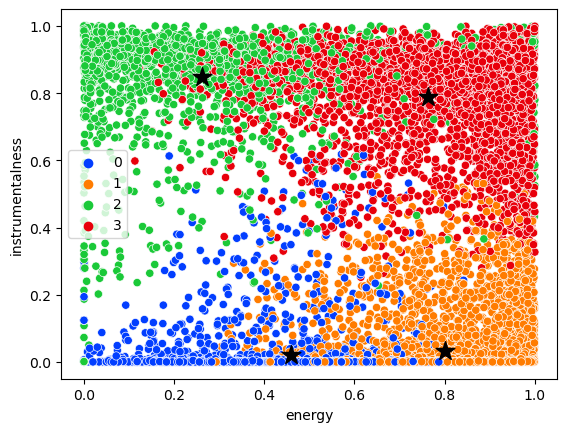

In [16]:
sns.scatterplot(data=df, 
                x="energy", 
                y="instrumentalness", 
                hue=kmeans.labels_, 
                palette="bright")

plt.scatter(centers[:,3], centers[:,8], c='black', marker='*', s=200)
plt.show()

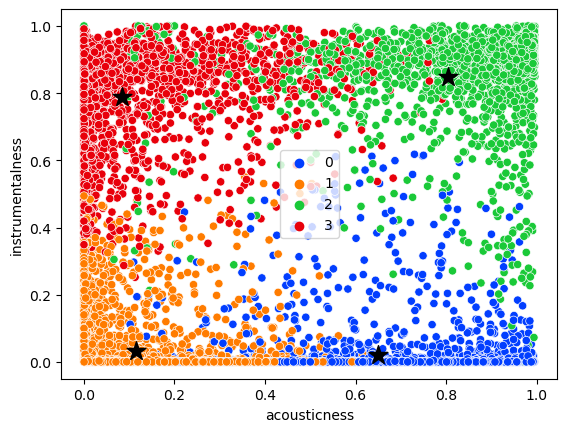

In [17]:
sns.scatterplot(data=df, 
                x="acousticness", 
                y="instrumentalness", 
                hue=kmeans.labels_, 
                palette="bright")

plt.scatter(centers[:,7], centers[:,8], c='black', marker='*', s=200)
plt.show()

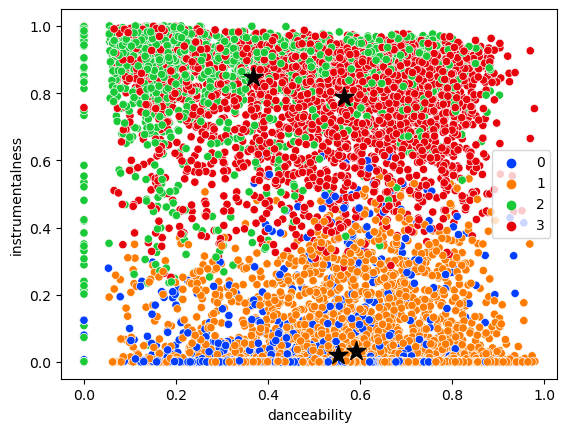

In [18]:
sns.scatterplot(data=df, 
                x="danceability", 
                y="instrumentalness", 
                hue=kmeans.labels_, 
                palette="bright")

plt.scatter(centers[:,2], centers[:,8], c='black', marker='*', s=200)
plt.show()

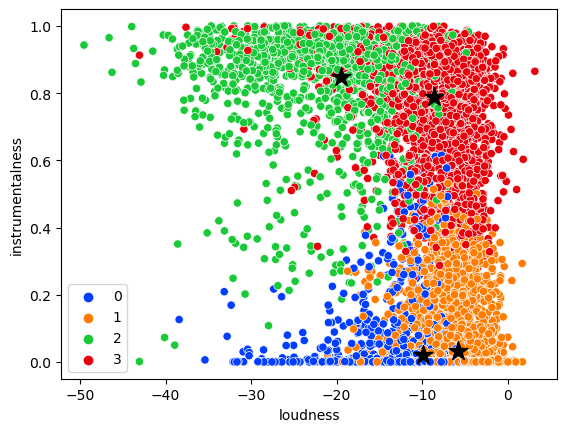

In [19]:
sns.scatterplot(data=df, 
                x="loudness", 
                y="instrumentalness", 
                hue=kmeans.labels_, 
                palette="bright")

plt.scatter(centers[:,5], centers[:,8], c='black', marker='*', s=200)
plt.show()

In [20]:
##### Remember to do the categorization of the continuous variables to check for "y_mapping"

In [21]:
#sns.pairplot(data=df, hue="kmeans.labels_", palette="bright")
#plt.savefig("pairplot with 4 clusters.png")
#plt.show()

#### Centroid movement for each attribute

In [22]:

norm_centers = kmeans.cluster_centers_

### SSE evaluation

In [23]:
np.unique(kmeans.labels_, return_counts=True)

(array([0, 1, 2, 3]), array([3186, 6852, 1771, 3191], dtype=int64))

In [24]:
print('SSE', kmeans.inertia_)
print('Silhouette', silhouette_score(X_minmax, kmeans.labels_))

SSE 5908.53834063123
Silhouette 0.21005945498553225


In [25]:
# how do we select the number of clusters k?

In [26]:
%%time
sse_list = []

for k in range(2, 21):
    kmeans = KMeans(n_clusters=k, n_init=10, max_iter=100)
    kmeans.fit(X_minmax)
    sse_list.append(kmeans.inertia_)

CPU times: total: 31.6 s
Wall time: 9.98 s


In [27]:
%%time
sil_list = []

for k in range(2, 21):
    kmeans = KMeans(n_clusters=k, n_init=10, max_iter=100)
    kmeans.fit(X_minmax)
    sil_list.append(silhouette_score(X_minmax, kmeans.labels_))

CPU times: total: 1min 37s
Wall time: 1min 16s


In [28]:
%%time
sil_list = []
dist = squareform(pdist(X_minmax)) # using a precomputed distance matrix

for k in range(2, 21):
    kmeans = KMeans(n_clusters=k, n_init=10, max_iter=100)
    kmeans.fit(X_minmax)
    sil_list.append(silhouette_score(dist, kmeans.labels_, metric='precomputed'))

CPU times: total: 59.6 s
Wall time: 41.9 s


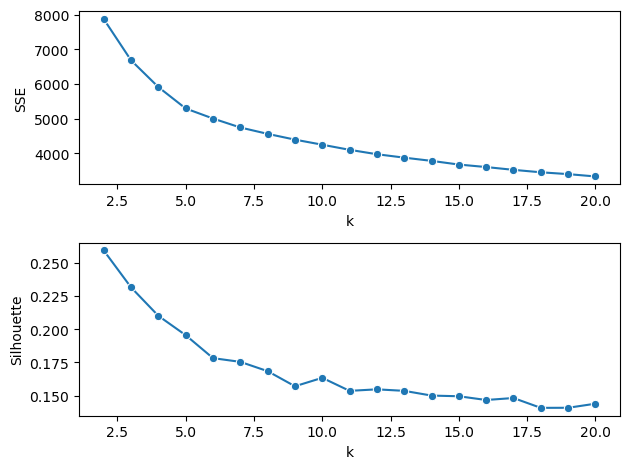

In [29]:
fig, axs = plt.subplots(2) 

sns.lineplot(x=range(2, len(sse_list) + 2), y=sse_list, marker='o', ax=axs[0])
axs[0].set(xlabel='k', ylabel='SSE')

sns.lineplot(x=range(2, len(sil_list)+ 2), y=sil_list, marker='o', ax=axs[1])
axs[1].set(xlabel='k', ylabel='Silhouette')
#plt.savefig("silhouette 100.png")
plt.tight_layout()

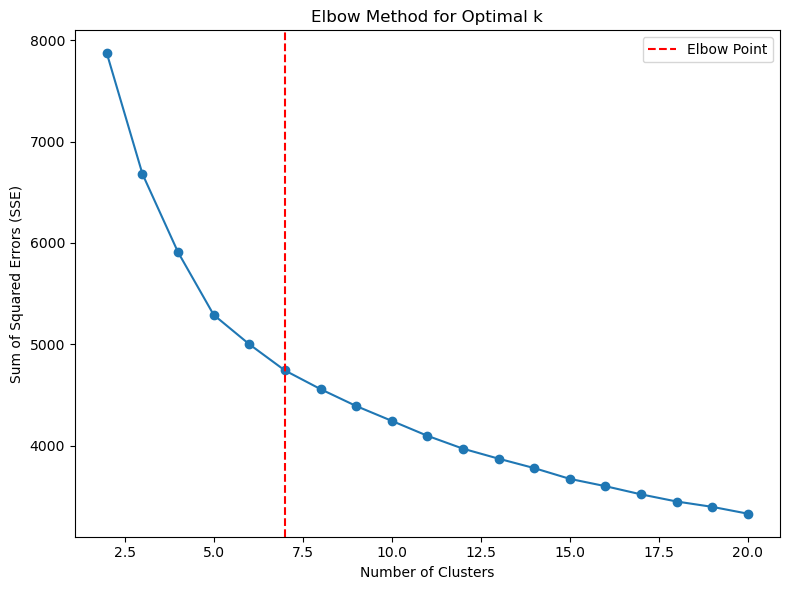

Elbow point (optimal k): 7


In [30]:
# Plotting the SSE curve
fig, axs = plt.subplots(1, 1, figsize=(8, 6))
axs.plot(range(2, len(sse_list) + 2), sse_list, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('Elbow Method for Optimal k')

# Finding the elbow point using KneeLocator
kneedle = KneeLocator(range(2, len(sse_list) + 2), sse_list, curve='convex', direction='decreasing')
elbow_point = kneedle.elbow

# Highlighting the elbow point on the plot
plt.axvline(x=elbow_point, color='red', linestyle='--', label='Elbow Point')

# Displaying the plot
plt.legend()
plt.tight_layout()
plt.show()

print(f"Elbow point (optimal k): {elbow_point}")

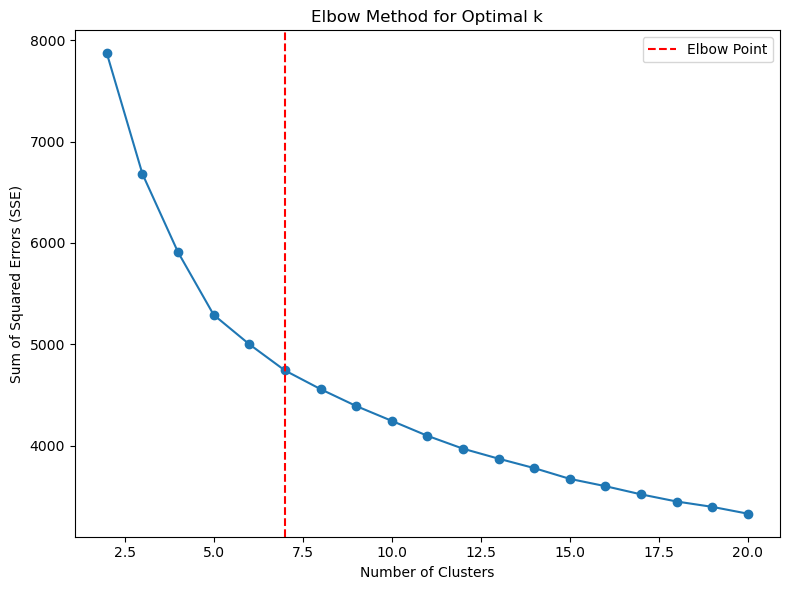

Elbow point (optimal k): 7


In [31]:
# Plotting the SSE curve
fig, axs = plt.subplots(1, 1, figsize=(8, 6))
axs.plot(range(2, len(sse_list) + 2), sse_list, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('Elbow Method for Optimal k')

# Finding the elbow point using KneeLocator
kneedle = KneeLocator(range(2, len(sse_list) + 2), sse_list, curve='convex', direction='decreasing')
elbow_point = kneedle.elbow

# Highlighting the elbow point on the plot
plt.axvline(x=elbow_point, color='red', linestyle='--', label='Elbow Point')

# Displaying the plot
plt.legend()
plt.tight_layout()
plt.show()

print(f"Elbow point (optimal k): {elbow_point}")

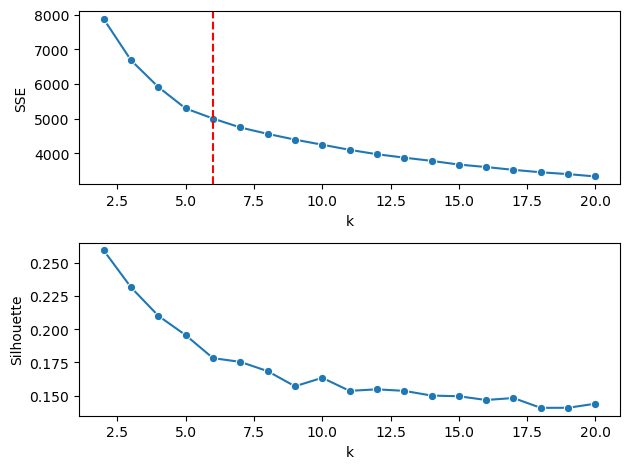

In [32]:
# Your code for creating the subplots and plotting the SSE and silhouette scores
fig, axs = plt.subplots(2) 

sns.lineplot(x=range(2, len(sse_list) + 2), y=sse_list, marker='o', ax=axs[0])
axs[0].set(xlabel='k', ylabel='SSE')

sns.lineplot(x=range(2, len(sil_list) + 2), y=sil_list, marker='o', ax=axs[1])
axs[1].set(xlabel='k', ylabel='Silhouette')

# Determine the elbow point for SSE (you might have your own method to find this)
elbow_point = 6  # Replace this with the identified elbow point

# Plot a vertical line at the elbow point for SSE in the first plot
axs[0].axvline(x=elbow_point, color='red', linestyle='--', label='Elbow Point')

plt.tight_layout()
plt.savefig("silhouette 100 vs.png")
plt.show()

In [33]:
df.head()

,name,duration_ms,explicit,popularity,artists,album_name,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,genre,kmeans.labels_
0,Long Road,241760,0,46,Funki Porcini,Hed Phone Sex,0.690,0.513,5,-12.529,0.0975,0.302000,0.53600,0.281,0.6350,142.221,4.0,j-dance,3
1,"Daniâl My Son, Where Did You Vanish?",444000,0,0,Siavash Amini,A Trail of Laughters,0.069,0.196,1,-24.801,0.0805,0.283000,0.93400,0.360,0.0336,75.596,4.0,iranian,2
2,Ondskapens Galakse,333506,0,3,Kvelertak,Nattesferd,0.363,0.854,2,-7.445,0.0397,0.000089,0.80000,0.262,0.4890,116.628,4.0,black-metal,3
3,Can't Look Away,269800,0,23,The Wood Brothers,One Drop of Truth,0.523,0.585,5,-5.607,0.0765,0.066400,0.00127,0.117,0.3850,140.880,4.0,bluegrass,1
4,Thunderground,307651,0,25,The Darkraver;DJ Vince,Happy Hardcore Top 100,0.643,0.687,7,-11.340,0.0539,0.000576,0.09690,0.299,0.6370,143.956,4.0,happy,1


### Subsetting

#### Cluster label 0

In [33]:
cluster0 = df[df['kmeans.labels_'] == 0]
#cluster0 = cluster0.drop('kmeans.labels_std', axis = 1)
cluster0.head()

,name,duration_ms,explicit,popularity,artists,album_name,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,genre,kmeans.labels_
13,知足,256692,0,51,Mayday,知足 just my pride 最真傑作選,0.406,0.230,4,-9.007,0.0297,0.8800,0.000000,0.1070,0.395,159.914,4.0,mandopop,0
18,Three Black Cats,124333,0,14,CoComelon,Halloween Party,0.883,0.395,0,-11.000,0.0404,0.4860,0.000018,0.0979,0.884,135.045,3.0,disney,0
21,Brokedown Palace 9/25: The Caverns - Live,344146,0,20,Greensky Bluegrass,Courage for the Road: Fall 2019 (Live),0.454,0.337,5,-15.906,0.0371,0.7930,0.001480,0.9220,0.249,123.612,4.0,bluegrass,0
41,i loved you first,227067,0,50,joan,i loved you first,0.556,0.276,0,-9.603,0.0269,0.0862,0.000007,0.0999,0.216,75.020,4.0,sleep,0
42,Filho de Davi,353986,0,49,Tony Allysson,Poderoso Deus,0.578,0.635,2,-5.335,0.0278,0.6610,0.000000,0.1380,0.343,137.980,4.0,brazil,0


In [34]:
# Create a dictionary to map colors to values
colors = ['blue']

#sns.pairplot(data=cluster0, hue= 'kmeans.labels_', palette=colors)
#plt.savefig("ppk0 MinMax.png")
#plt.show()

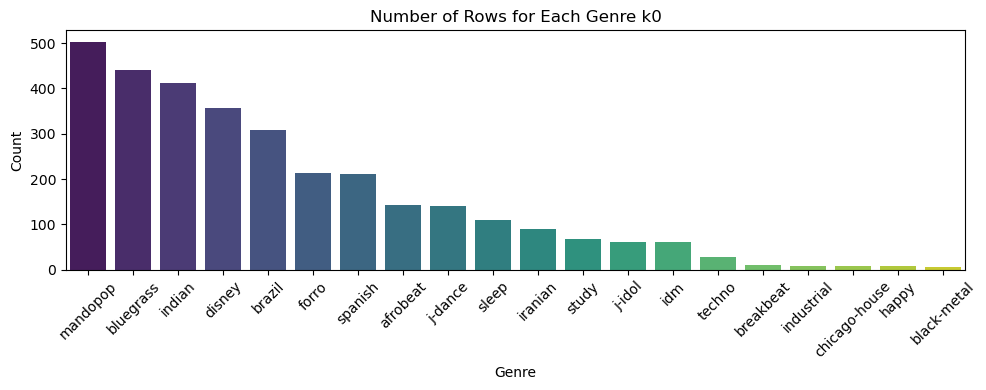

In [35]:
genre_counts = cluster0['genre'].value_counts()

# Plotting the bar plot using Seaborn
plt.figure(figsize=(10, 4))  # Adjust the figure size as needed
sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='viridis')
plt.title('Number of Rows for Each Genre k0')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed
plt.tight_layout()
plt.savefig("k0 genre count.png")
plt.show()

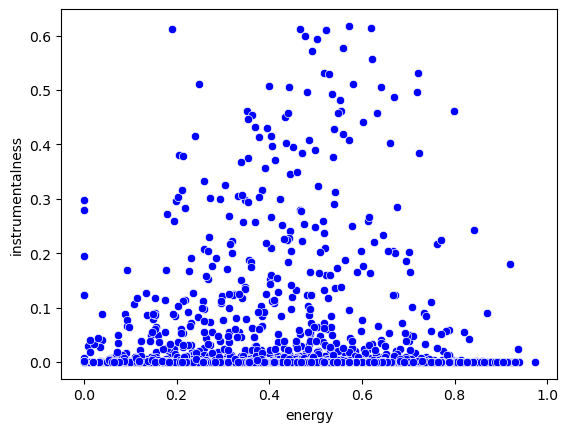

In [36]:
sns.scatterplot(data=cluster0, 
                x="energy", 
                y="instrumentalness", 
                color = 'blue')
plt.savefig("k0 instr_energy.png")
plt.show()

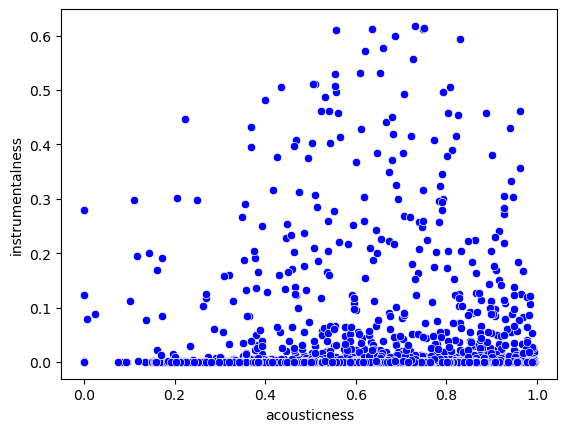

In [37]:
sns.scatterplot(data=cluster0, 
                x="acousticness", 
                y="instrumentalness", 
                color="blue",
               )
plt.savefig("k0 instr_acous.png")
plt.show()

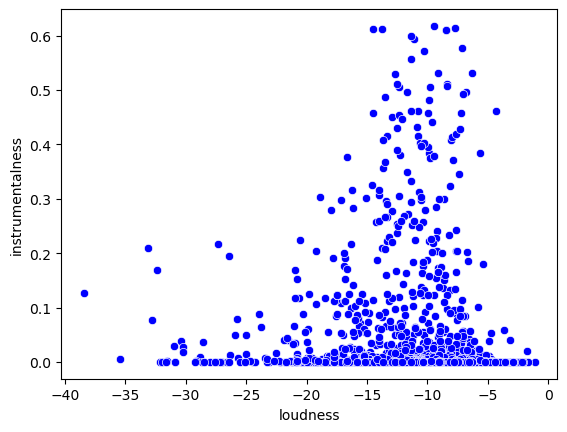

In [38]:
sns.scatterplot(data=cluster0, 
                x="loudness", 
                y="instrumentalness", 
                color="blue",
               )
plt.savefig("k0 instr_loud.png")
#plt.show()

#### Cluster label 1

In [39]:
cluster1 = df[df['kmeans.labels_'] == 1]
#cluster1 = cluster1.drop('kmeans.labels_std', axis = 1)
cluster1.head()

,name,duration_ms,explicit,popularity,artists,album_name,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,genre,kmeans.labels_
3,Can't Look Away,269800,0,23,The Wood Brothers,One Drop of Truth,0.523,0.585,5,-5.607,0.0765,0.066400,0.001270,0.1170,0.385,140.880,4.0,bluegrass,1
4,Thunderground,307651,0,25,The Darkraver;DJ Vince,Happy Hardcore Top 100,0.643,0.687,7,-11.340,0.0539,0.000576,0.096900,0.2990,0.637,143.956,4.0,happy,1
5,Sick Bubblegum,224266,1,32,Rob Zombie,Hellbilly Deluxe 2 (Standard Explicit),0.642,0.972,5,-3.047,0.0967,0.001520,0.000024,0.3840,0.421,118.035,4.0,industrial,1
6,The Diamond Four,225160,0,27,Momoiro Clover Z,MOMOIRO CLOVER Z,0.777,0.949,2,-2.488,0.0585,0.306000,0.000016,0.2990,0.850,109.992,4.0,j-idol,1
7,Quiero tener tu presencia,220626,0,64,Seguridad Social,Furia Latina,0.741,0.816,4,-5.597,0.0797,0.021100,0.000000,0.0981,0.574,146.075,4.0,spanish,1


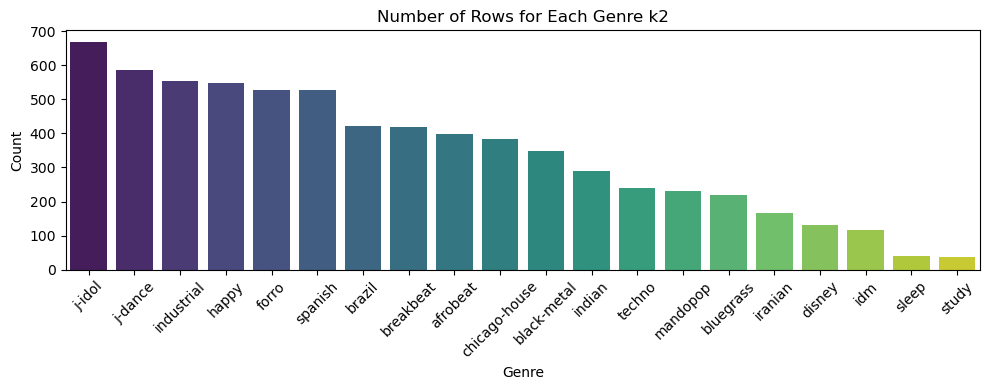

In [40]:
genre_counts = cluster1['genre'].value_counts()

# Plotting the bar plot using Seaborn
plt.figure(figsize=(10, 4))  # Adjust the figure size as needed
sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='viridis')
plt.title('Number of Rows for Each Genre k2')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed
plt.tight_layout()
plt.savefig("k1 genre count.png")
plt.show()

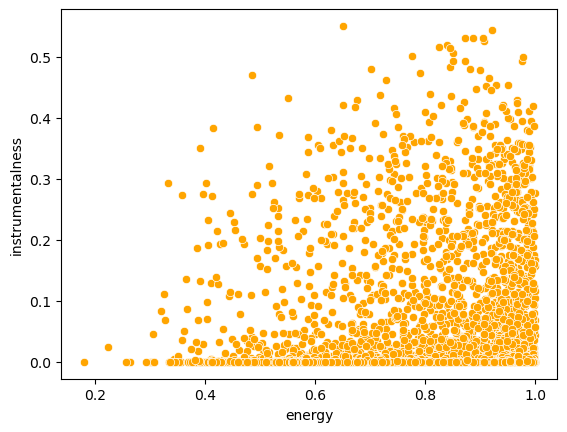

In [41]:
sns.scatterplot(data=cluster1, 
                x="energy", 
                y="instrumentalness", 
                color= 'orange')
plt.savefig("k1 instr_energy.png")
plt.show()


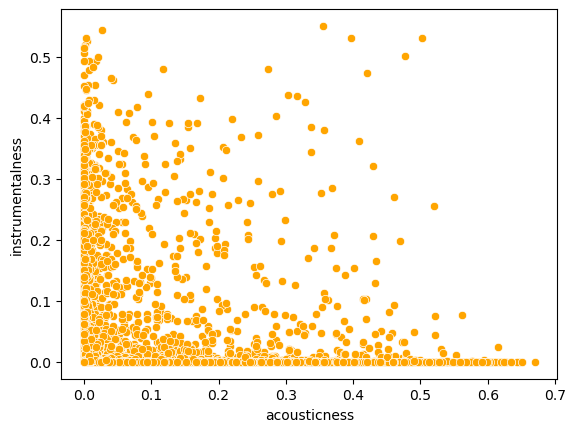

In [42]:
sns.scatterplot(data=cluster1, 
                x="acousticness", 
                y="instrumentalness", 
                color="orange",
               )
plt.savefig("k1 instr_acous.png")
plt.show()

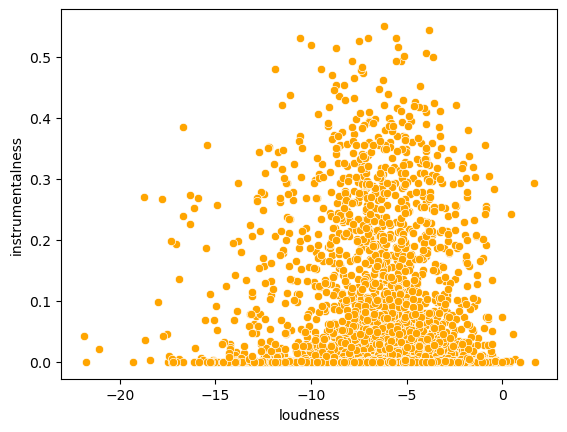

In [43]:
sns.scatterplot(data=cluster1, 
                x="loudness", 
                y="instrumentalness", 
                color="orange",
               )
plt.savefig("k1 instr_loud.png")
plt.show()

In [44]:
# Create a dictionary to map colors to values
colors = ['orange']

#sns.pairplot(data=cluster1, hue= 'kmeans.labels_', palette=colors)
#plt.savefig("k1 MinMax.png")
#plt.show()

#### cluster label 2

In [45]:
cluster2 = df[df['kmeans.labels_'] == 2]
#cluster2 = cluster2.drop('kmeans.labels_std', axis = 1)
cluster2.head()

,name,duration_ms,explicit,popularity,artists,album_name,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,genre,kmeans.labels_
1,"Daniâl My Son, Where Did You Vanish?",444000,0,0,Siavash Amini,A Trail of Laughters,0.069,0.19600,1,-24.801,0.0805,0.283,0.934,0.360,0.0336,75.596,4.0,iranian,2
8,Shhhh Baby Shusher Mama Shushing Background Fa...,116815,0,45,Baby Sleep;Baby Shushing;Dreams of Dreams,Shhhh Baby Shusher Mama Shushing Background Fa...,0.153,0.11900,6,-25.160,0.0501,0.704,0.913,0.543,0.0342,84.886,4.0,sleep,2
16,Querencia,194648,0,57,Cameron Sinosa,Querencia,0.170,0.00316,5,-38.615,0.0422,0.991,0.931,0.111,0.0946,70.964,3.0,sleep,2
24,Monday Morning Before Work,227320,0,13,Kelpe,Kyverdale Road,0.757,0.15300,8,-23.574,0.0470,0.857,0.952,0.106,0.4760,102.987,4.0,idm,2
29,never had,140487,0,12,Organ Tapes,唱着那无人问津的歌谣 / Chang Zhe Na Wu Ren Wen Jin De Ge...,0.405,0.38900,2,-14.809,0.0419,0.863,0.720,0.134,0.7480,89.271,4.0,techno,2


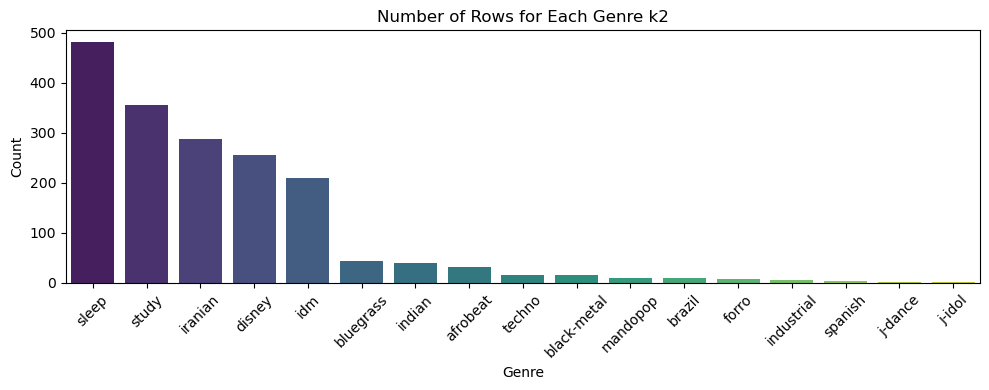

In [46]:
genre_counts = cluster2['genre'].value_counts()

# Plotting the bar plot using Seaborn
plt.figure(figsize=(10, 4))  # Adjust the figure size as needed
sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='viridis')
plt.title('Number of Rows for Each Genre k2')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed
plt.tight_layout()
plt.savefig("k2 genre count.png")
plt.show()

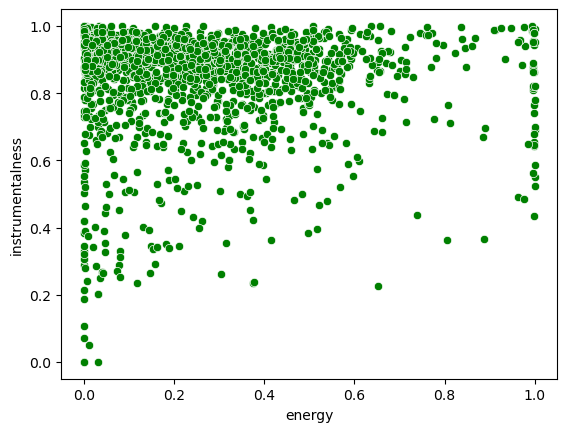

In [47]:
sns.scatterplot(data=cluster2, 
                x="energy", 
                y="instrumentalness", 
                color="green",
               )
plt.savefig("k2 instr_energy.png")
plt.show()

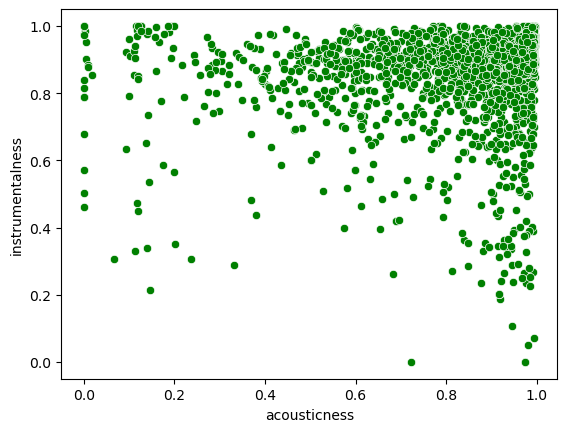

In [48]:
sns.scatterplot(data=cluster2, 
                x="acousticness", 
                y="instrumentalness", 
                color="green",
               )
plt.savefig("k2 instr_acous.png")
plt.show()

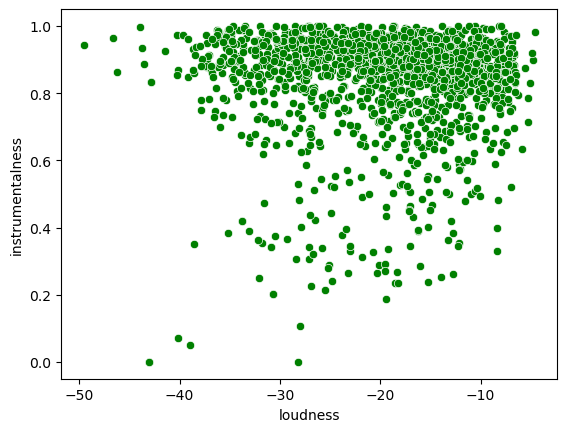

In [49]:
sns.scatterplot(data=cluster2, 
                x="loudness", 
                y="instrumentalness", 
                color="green",
               )
plt.savefig("k2 instr_loud.png")
#plt.show()

In [50]:
# Create a dictionary to map colors to values
colors = ['green']

#sns.pairplot(data=cluster2, hue= 'kmeans.labels_', palette=colors)
#plt.savefig("k2 MinMax.png")
#plt.show()

#### cluster label 3

In [51]:
cluster3 = df[df['kmeans.labels_'] == 3]
#cluster2 = cluster2.drop('kmeans.labels_std', axis = 1)
cluster3.head()

,name,duration_ms,explicit,popularity,artists,album_name,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,genre,kmeans.labels_
0,Long Road,241760,0,46,Funki Porcini,Hed Phone Sex,0.690,0.513,5,-12.529,0.0975,0.302000,0.536,0.2810,0.635,142.221,4.0,j-dance,3
2,Ondskapens Galakse,333506,0,3,Kvelertak,Nattesferd,0.363,0.854,2,-7.445,0.0397,0.000089,0.800,0.2620,0.489,116.628,4.0,black-metal,3
10,Gammy Elbow - VIP Mix,191296,0,19,DJ Zinc;Chris Lorenzo,Gammy Elbow (VIP Mix),0.924,0.893,7,-2.567,0.1910,0.016600,0.859,0.0907,0.613,129.999,4.0,j-dance,3
11,Nobody Supposed to Be Here,99526,0,21,Kyle Edwards;DJ Smallz 732,Warning,0.885,0.750,6,-8.859,0.1730,0.087800,0.963,0.0453,0.406,140.079,4.0,techno,3
19,Dust till Dawn,134000,0,45,Dusty Decks,Solid Centre,0.747,0.571,10,-6.985,0.1190,0.026400,0.888,0.1020,0.710,89.960,4.0,study,3


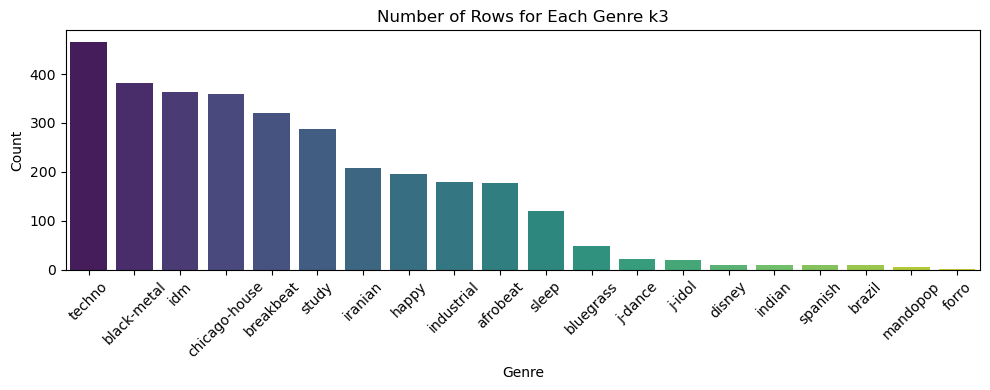

In [52]:
genre_counts = cluster3['genre'].value_counts()

# Plotting the bar plot using Seaborn
plt.figure(figsize=(10, 4))  # Adjust the figure size as needed
sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='viridis')
plt.title('Number of Rows for Each Genre k3')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed
plt.tight_layout()
plt.savefig("k3 genre count.png")
plt.show()

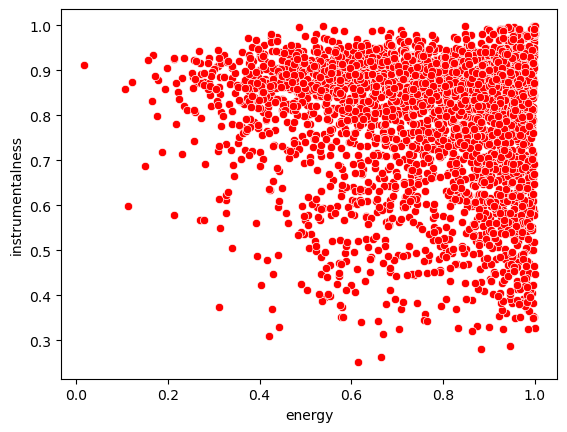

In [53]:
sns.scatterplot(data=cluster3, 
                x="energy", 
                y="instrumentalness", 
                color="red",
               )
plt.savefig("k3 instr_energy.png")
plt.show()

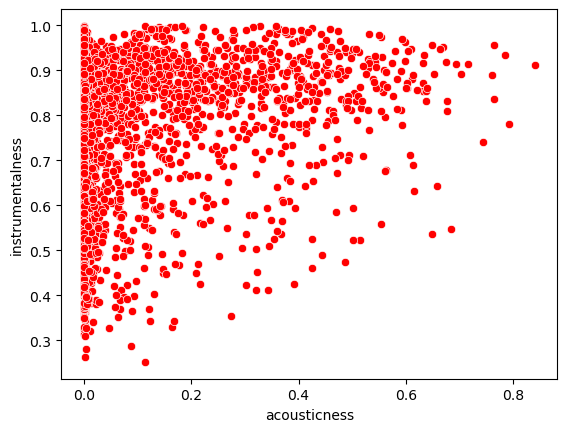

In [54]:
sns.scatterplot(data=cluster3, 
                x="acousticness", 
                y="instrumentalness", 
                color="red",
               )
plt.savefig("k3 instr_acous.png")
plt.show()

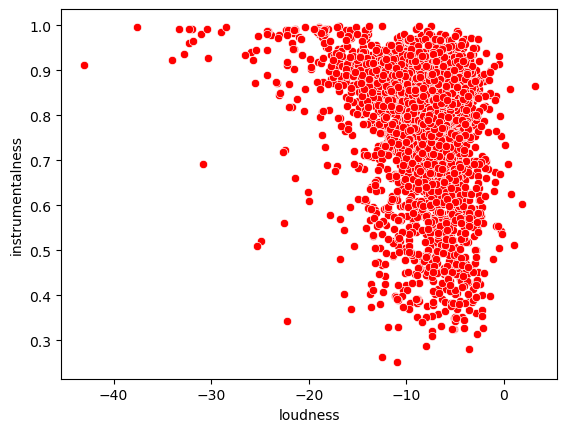

In [55]:
sns.scatterplot(data=cluster3, 
                x="loudness", 
                y="instrumentalness", 
                color="red",
               )
plt.savefig("k3 instr_loud.png")
plt.show()

In [56]:
# Create a dictionary to map colors to values
colors = ['red']

#sns.pairplot(data=cluster3, hue= 'kmeans.labels_', palette=colors)
#plt.savefig("k2 MinMax.png")
#plt.show()

In [57]:
#cluster0 = df[df["kmeans.labels_"] == 0]
#np.unique(cluster0["genre"],return_counts=True)

In [58]:
# Assuming 'kmeans.labels_' contains the cluster labels in your DataFrame
# Replace 'kmeans.labels_' with the actual column name that stores cluster labels in your DataFrame

# Iterate through clusters 0 to 3
for cluster_num in range(4):  # This will loop through clusters 0 to 3 (total 4 clusters: 0, 1, 2, 3)
    cluster = df[df["kmeans.labels_"] == cluster_num]
    unique_genres, genre_counts = np.unique(cluster["genre"], return_counts=True)
    
    # Sort genres by count in decreasing order
    sorted_indices = np.argsort(genre_counts)[::-1]
    unique_genres_sorted = unique_genres[sorted_indices]
    genre_counts_sorted = genre_counts[sorted_indices]
    
    print(f"Cluster {cluster_num}:")
    for genre, count in zip(unique_genres_sorted, genre_counts_sorted):
        print(f"Genre: {genre}, Count: {count}")
    print("\n")

Cluster 0:
Genre: mandopop, Count: 503
Genre: bluegrass, Count: 441
Genre: indian, Count: 412
Genre: disney, Count: 356
Genre: brazil, Count: 309
Genre: forro, Count: 213
Genre: spanish, Count: 212
Genre: afrobeat, Count: 143
Genre: j-dance, Count: 140
Genre: sleep, Count: 109
Genre: iranian, Count: 89
Genre: study, Count: 68
Genre: j-idol, Count: 61
Genre: idm, Count: 60
Genre: techno, Count: 29
Genre: breakbeat, Count: 11
Genre: industrial, Count: 9
Genre: chicago-house, Count: 8
Genre: happy, Count: 7
Genre: black-metal, Count: 6


Cluster 1:
Genre: j-idol, Count: 669
Genre: j-dance, Count: 586
Genre: industrial, Count: 555
Genre: happy, Count: 547
Genre: forro, Count: 528
Genre: spanish, Count: 526
Genre: brazil, Count: 423
Genre: breakbeat, Count: 419
Genre: afrobeat, Count: 398
Genre: chicago-house, Count: 383
Genre: black-metal, Count: 347
Genre: indian, Count: 290
Genre: techno, Count: 239
Genre: mandopop, Count: 232
Genre: bluegrass, Count: 218
Genre: iranian, Count: 167
Genre